In [133]:
!pip install plotly
!pip install openpyxl

In [134]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [135]:
#Set path to data folder
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data')

# Read the combined data file
df1 = pd.read_excel('combined_data.xlsx')

Informacion general y descripcion de los datos:

In [136]:
df1.shape

(131976, 5)

In [137]:
df1.describe()

,id,last_scraped
count,1.319760e+05,131976
mean,5.630335e+17,2024-09-11 17:04:42.815057408
min,2.185300e+04,2024-03-22 00:00:00
25%,3.496711e+07,2024-06-15 00:00:00
50%,7.054828e+17,2024-09-11 00:00:00
75%,1.033379e+18,2024-12-12 00:00:00
max,1.369179e+18,2025-03-12 00:00:00
std,5.035184e+17,NaN


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131976 entries, 0 to 131975
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      131976 non-null  int64         
 1   last_scraped            131976 non-null  datetime64[ns]
 2   room_type               131976 non-null  object        
 3   price                   103465 non-null  object        
 4   neighbourhood_cleansed  131976 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.0+ MB


In [139]:
df1.head()

,id,last_scraped,room_type,price,neighbourhood_cleansed
0,21853,2024-03-22,Private room,$31.00,Cármenes
1,24805,2024-03-22,Entire home/apt,$92.00,Universidad
2,204570,2024-03-22,Entire home/apt,$180.00,Cortes
3,30320,2024-03-22,Entire home/apt,NaN,Sol
4,205199,2024-03-22,Entire home/apt,$65.00,Universidad


Limpieza de datos, duplicados:

In [140]:
# Number of duplicates
print(f"Number of duplicates: {df1.duplicated().sum()}")

Number of duplicates: 0


Limpieza de datos, valores nulos:

In [141]:
# Общее количество пропущенных значений / Total number of missing values
print(f"Total number of missing values: {df1.isnull().sum().sum()}")

# Количество пропущенных значений по колонкам / Number of missing values by columns
print("\nNumber of missing values by columns:")
print(df1.isnull().sum())

# Процент пропущенных значений / # Percentage of missing values
print("\nPercentage of missing values:")
print((df1.isnull().sum() / len(df1) * 100).round(2))

Total number of missing values: 28511

Number of missing values by columns:
id                            0
last_scraped                  0
room_type                     0
price                     28511
neighbourhood_cleansed        0
dtype: int64

Percentage of missing values:
id                         0.0
last_scraped               0.0
room_type                  0.0
price                     21.6
neighbourhood_cleansed     0.0
dtype: float64


In [142]:

# Очищаем цены от символов и преобразуем в числа /Clean prices by removing symbols and convert to numbers
df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Проверяем количество нулевых значений /Check the number of null values
print(f"\nNumber of null values: {df1['price'].isna().sum()}")

# Удаляем строки с нулевыми значениями / Remove rows with zero values
df2 = df1[df1['price'] != 0]
df2 = df2.dropna(subset=['price'])
print(f"Number of rows after removing zero prices: {len(df2)}")




Number of null values: 28511
Number of rows after removing zero prices: 103465


In [143]:
# Количество пропущенных значений по колонкам /Number of missing values by columns
print("\nMissing values by columns:")
print(df2.isnull().sum())

# Процент пропущенных значений /Percentage of missing values
print("\nPercentage of missing values:")
print((df2.isnull().sum() / len(df2) * 100).round(2))


Missing values by columns:
id                        0
last_scraped              0
room_type                 0
price                     0
neighbourhood_cleansed    0
dtype: int64

Percentage of missing values:
id                        0.0
last_scraped              0.0
room_type                 0.0
price                     0.0
neighbourhood_cleansed    0.0
dtype: float64


In [144]:
df2.shape

(103465, 5)

In [145]:
# Количество уникальных значений в каждой колонке /Number of unique values in each column
print("\nNumber of unique values in each column:")
print(df2.nunique())


Number of unique values in each column:
id                        32777
last_scraped                 12
room_type                     4
price                       966
neighbourhood_cleansed      128
dtype: int64


In [146]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Анализ выбросов для каждой числовой колонки / Analysis of outliers for each numeric column
numeric_columns = ['price']
for col in numeric_columns:
    outliers = detect_outliers(df2, col)
    print(f"\nOutlier analysis for {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outliers percentage: {(len(outliers)/len(df2)*100):.2f}%")
    print("Outliers statistics:")
    print(outliers[col].describe())


Outlier analysis for price:
Number of outliers: 6463
Outliers percentage: 6.25%
Outliers statistics:
count     6463.000000
mean       659.286709
std       1363.900246
min        276.000000
25%        312.000000
50%        384.000000
75%        514.000000
max      23124.000000
Name: price, dtype: float64



Analysis of the impact of outliers for price:
Statistics with outliers:
count    103465.000000
mean        137.698391
std         370.503373
min           1.000000
25%          63.000000
50%          99.000000
75%         148.000000
max       23124.000000
Name: price, dtype: float64

Statistics without outliers:
count    97002.000000
mean       102.946269
std         56.219391
min          1.000000
25%         60.000000
50%         95.000000
75%        136.000000
max        275.000000
Name: price, dtype: float64


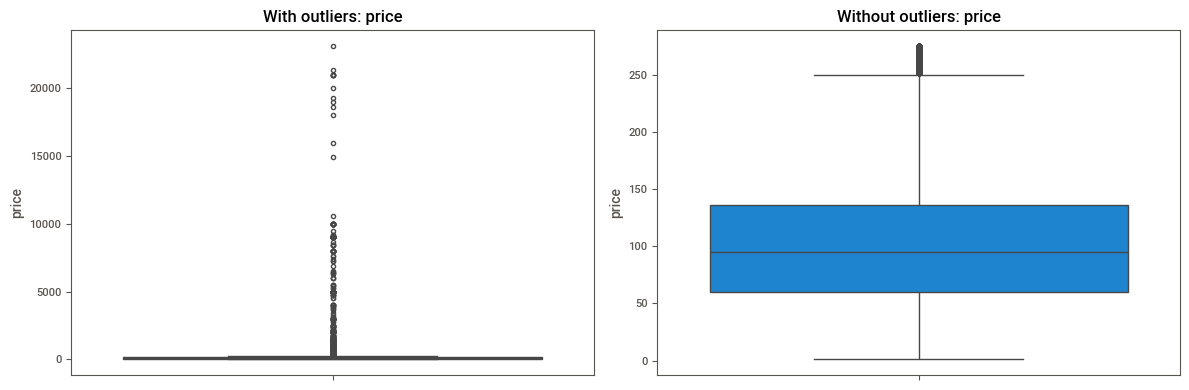

In [147]:
def analyze_outlier_impact(df, column):
    # Создаем копию без выбросов / Create a copy without outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)

    df_no_outliers = df[mask].copy()

    # Сравниваем статистики / Compare statistics
    print(f"\nAnalysis of the impact of outliers for {column}:")
    print("Statistics with outliers:")
    print(df[column].describe())
    print("\nStatistics without outliers:")
    print(df_no_outliers[column].describe())

    # Визуализация / Visualization
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'With outliers: {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'Without outliers: {column}')
    plt.tight_layout()
    plt.show()

# Применяем анализ для каждой колонки / Apply analysis for each column
for col in numeric_columns:
    analyze_outlier_impact(df2, col)

In [148]:
def get_outliers_df(df, column):
   # Calculate boundaries for outliers / Вычисляем границы для выбросов
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask for outliers / Создаем маску для выбросов
    mask = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Create a dataframe with only outliers / Создаем датафрейм только с выбросами
    outliers_df = df[mask].copy()

    # Add information about boundaries / Добавляем информацию о границах
    outliers_df[f'{column}_lower_bound'] = lower_bound
    outliers_df[f'{column}_upper_bound'] = upper_bound

    return outliers_df

# Example usage for one column / Пример использования для одной колонки
column_name = 'price'
outliers_df = get_outliers_df(df2, column_name)

# Print information about outliers / Выводим информацию о выбросах
print(f"Number of outliers in column {column_name}: {len(outliers_df)}")
print(f"Percentage of outliers:  {(len(outliers_df)/len(df2)*100):.2f}%")
print("\nOutliers statistics:")
print(outliers_df[column_name].describe())
print("\nFirst outliers:")
print(outliers_df[[column_name, f'{column_name}_lower_bound', f'{column_name}_upper_bound']].head(20))

Number of outliers in column price: 6463
Percentage of outliers:  6.25%

Outliers statistics:
count     6463.000000
mean       659.286709
std       1363.900246
min        276.000000
25%        312.000000
50%        384.000000
75%        514.000000
max      23124.000000
Name: price, dtype: float64

First outliers:
      price  price_lower_bound  price_upper_bound
108   309.0              -64.5              275.5
196   315.0              -64.5              275.5
205   379.0              -64.5              275.5
223   296.0              -64.5              275.5
250  1194.0              -64.5              275.5
290   510.0              -64.5              275.5
399   326.0              -64.5              275.5
405   325.0              -64.5              275.5
410   354.0              -64.5              275.5
418   500.0              -64.5              275.5
420   500.0              -64.5              275.5
422   500.0              -64.5              275.5
424   500.0              -64.5     

In [149]:
# Create a dataframe with prices above 1000 / Создаем датафрейм с ценами выше 1000
high_price_df = df2[df2['price'] > 1000]

# Print all rows with prices above 1000 / Выводим все строки с ценами выше 1000
print(f"\nNumber of rows with price above 1000: {len(high_price_df)}")
print("\nAll rows with price above 1000:")
print(high_price_df[['price']].sort_values('price', ascending=False))

# If more information about each row is needed / Если нужно вывести больше информации о каждой строке
print("\nDetailed information about rows with price above 1000:")
print(high_price_df.sort_values('price', ascending=False))


Number of rows with price above 1000: 401

All rows with price above 1000:
          price
43571   23124.0
108021  21347.0
33911   21013.0
9773    21000.0
113894  21000.0
...         ...
65998    1005.0
56340    1001.0
22669    1001.0
123597   1001.0
102042   1001.0

[401 rows x 1 columns]

Detailed information about rows with price above 1000:
                         id last_scraped        room_type    price  \
43571   1087700981397176960   2025-03-05  Entire home/apt  23124.0   
108021             18816591   2024-12-12  Entire home/apt  21347.0   
33911              45249073   2025-03-10  Entire home/apt  21013.0   
9773               45249073   2024-03-22  Entire home/apt  21000.0   
113894             45249073   2024-12-12  Entire home/apt  21000.0   
...                     ...          ...              ...      ...   
65998              29850257   2024-06-15  Entire home/apt   1005.0   
56340   1029047360999101056   2024-06-15  Entire home/apt   1001.0   
22669   10290473609991

In [150]:
# Create a copy of the dataframe for safe processing / Создаем копию датафрейма для безопасной обработки
df3 = df2.copy()

# Define reasonable price boundaries for Madrid / Определяем разумные границы цены для Мадрида
# Average nightly price in Madrid usually doesn't exceed 300-400€ / Средняя цена за ночь в Мадриде обычно не превышает 300-400€
# Setting upper limit at 1000€ as reasonable maximum / Установим верхнюю границу в 1000€ как разумный максимум
max_reasonable_price = 1000

# removing rows / Удаляем строки с нереальными ценами
df3 = df2[df2['price'] <= max_reasonable_price].copy()

print(f"Number of removed rows: {len(df2) - len(df3)}")
print(f"Percentage of removed rows: {((len(df2) - len(df2))/len(df2)*100):.2f}%")

Number of removed rows: 401
Percentage of removed rows: 0.00%


In [151]:
# Общее количество пропущенных значений / Total number of missing values
print(f"Total number of missing values: {df3.isnull().sum().sum()}")

# Количество пропущенных значений по колонкам / Number of missing values by columns
print("\nNumber of missing values by columns:")
print(df3.isnull().sum())

# Процент пропущенных значений / # Percentage of missing values
print("\nPercentage of missing values:")
print((df3.isnull().sum() / len(df3) * 100).round(2))

Total number of missing values: 0

Number of missing values by columns:
id                        0
last_scraped              0
room_type                 0
price                     0
neighbourhood_cleansed    0
dtype: int64

Percentage of missing values:
id                        0.0
last_scraped              0.0
room_type                 0.0
price                     0.0
neighbourhood_cleansed    0.0
dtype: float64


In [152]:
!pip install --upgrade scikit-learn
!pip install category_encoders
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

# OneHotEncoding for room_type
ohe = OneHotEncoder(sparse_output=False)
room_type_encoded = ohe.fit_transform(df3[['room_type']])
room_type_columns = ohe.get_feature_names_out(['room_type'])
room_type_df = pd.DataFrame(room_type_encoded, columns=room_type_columns, index=df3.index)

# TargetEncoding for neighbourhood_cleansed
te = TargetEncoder()
neighbourhood_encoded = te.fit_transform(df3[['neighbourhood_cleansed']], df3['price'])
neighbourhood_encoded.columns = ['neighbourhood_encoded']
neighbourhood_encoded.index = df3.index

# Combine encoded features with original dataframe
df_final = pd.concat([
    df3[['id', 'last_scraped', 'price']],
    room_type_df,
    neighbourhood_encoded
], axis=1)

# Reset index to ensure proper ordering
df_final = df_final.reset_index(drop=True)

# Display results
print("\nEncoded dataframe shape:", df_final.shape)
print("\nFirst 5 rows of encoded dataframe:")
print(df_final.head())
print("\nColumn names after encoding:")
print(df_final.columns.tolist())




Encoded dataframe shape: (103064, 8)

First 5 rows of encoded dataframe:
       id last_scraped  price  room_type_Entire home/apt  \
0   21853   2024-03-22   31.0                        0.0   
1   24805   2024-03-22   92.0                        1.0   
2  204570   2024-03-22  180.0                        1.0   
3  205199   2024-03-22   65.0                        1.0   
4  209373   2024-03-22   32.0                        0.0   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  \
0                   0.0                     1.0                    0.0   
1                   0.0                     0.0                    0.0   
2                   0.0                     0.0                    0.0   
3                   0.0                     0.0                    0.0   
4                   0.0                     1.0                    0.0   

   neighbourhood_encoded  
0              80.967480  
1             136.482523  
2             155.377679  
3           

In [153]:
df_final.to_csv('final_data.csv', index=False)

In [154]:
# Install ydata-profiling
!pip install ydata-profiling

from ydata_profiling import ProfileReport

# Generate EDA report
profile = ProfileReport(df_final,
                       title="Airbnb Data Profiling Report",
                       html={'style': {'full_width': True}},
                       progress_bar=False)

# Display the report in notebook
profile.to_notebook_iframe()

100%|██████████| 8/8 [00:00<00:00, 33.70it/s]
